# Data_Load

## **Imports**

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Dataset Load**

In [83]:
game_data = pd.read_csv('csv/game_data_all.csv')


In [84]:
game_data.head()

,Unnamed: 0,game,link,release,peak_players,positive_reviews,negative_reviews,total_reviews,rating,primary_genre,store_genres,publisher,developer,detected_technologies,store_asset_mod_time,review_percentage,players_right_now,24_hour_peak,all_time_peak,all_time_peak_date
0,0,Pizza Tower,/app/2231450/,2023-01-26,4529,19807,227,20034,96.39,Action (1),"Action (1), Indie (23)",Tour De Pizza,Tour De Pizza,Engine.GameMaker; SDK.FMOD,2023-01-10,98.0,"3,101","3,606",4529,2023-03-25
1,1,Resident Evil 4,/app/2050650/,2023-03-24,168191,61752,1616,63368,95.75,Action (1),"Action (1), Adventure (25)",CAPCOM Co. Ltd.,CAPCOM Co. Ltd.,Engine.RE_Engine; SDK.AMD_GPU_Services,2023-03-29,97.0,"46,289","47,164",168191,2023-03-25
2,2,The Murder of Sonic the Hedgehog,/app/2324650/,2023-03-31,15543,12643,213,12856,95.54,Casual (4),"Casual (4), Free to Play (37), Indie (23), Sim...",SEGA,SEGA,Engine.Unity; SDK.UnityBurst; SDK.cURL,2023-03-24,98.0,618,776,15543,2023-03-31
3,3,Pineapple on pizza,/app/2263010/,2023-03-28,1415,11717,209,11926,95.39,Indie (23),"Casual (4), Free to Play (37), Indie (23)",Majorariatto,Majorariatto,Engine.Unity; SDK.cURL,2023-03-22,98.0,101,101,1415,2023-03-28
4,4,Hi-Fi RUSH,/app/1817230/,2023-01-25,6132,14152,324,14476,95.09,Action (1),Action (1),Bethesda Softworks,Tango Gameworks,Engine.Unreal; SDK.Intel_OID; SDK.Intel_XeSS; ...,2023-04-11,97.0,630,664,6132,2023-01-29


In [85]:
game_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67571 entries, 0 to 67570
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             67571 non-null  int64  
 1   game                   67571 non-null  object 
 2   link                   67571 non-null  object 
 3   release                67571 non-null  object 
 4   peak_players           67571 non-null  int64  
 5   positive_reviews       67571 non-null  int64  
 6   negative_reviews       67571 non-null  int64  
 7   total_reviews          67571 non-null  int64  
 8   rating                 67571 non-null  float64
 9   primary_genre          67561 non-null  object 
 10  store_genres           67514 non-null  object 
 11  publisher              67110 non-null  object 
 12  developer              67443 non-null  object 
 13  detected_technologies  60265 non-null  object 
 14  store_asset_mod_time   67275 non-null  object 
 15  re

In [86]:
def missing_values(data) :
    missing = data.isnull().sum()
    print('##############################')
    print('\n')
    print(missing[missing > 0])
    print('\n')
    print('##############################')

In [87]:
missing_values(game_data)

##############################


primary_genre               10
store_genres                57
publisher                  461
developer                  128
detected_technologies     7306
store_asset_mod_time       296
review_percentage        19804
players_right_now            6
24_hour_peak                 6
all_time_peak_date           6
dtype: int64


##############################


## **Data Manipulation**

In [88]:
def change_name(data, col1, col2) :
    data.rename(columns = {col1 : col2}, inplace = True)

In [89]:
change_name(game_data, 'Unnamed: 0', 'id')

In [90]:
drop_list = ['link', 'store_genres', 'store_asset_mod_time', 'players_right_now', '24_hour_peak']
game_data.drop(columns = drop_list, inplace = True)

In [91]:
game_data['primary_genre'] = game_data['primary_genre'].astype(str)
game_data['detected_technologies'] = game_data['detected_technologies'].astype(str)

In [92]:
def rem_brackets(text) :
    return text.split('(')[0].rstrip()

In [93]:
game_data['primary_genre'] = game_data['primary_genre'].apply(rem_brackets)

In [94]:
def technologies_clean(text) :
    return text.split(';')[0].lstrip('Engine.')

In [95]:
game_data['detected_technologies'] = game_data['detected_technologies'].apply(technologies_clean)

In [96]:
def to_date(data):
   return pd.to_datetime(data)

In [97]:
game_data.release = game_data.release.apply(to_date)

game_data.all_time_peak_date = game_data.all_time_peak_date.apply(to_date)

In [98]:

game_data['release_year'] = game_data['release'].dt.year

In [99]:
game_data.head()

,id,game,release,peak_players,positive_reviews,negative_reviews,total_reviews,rating,primary_genre,publisher,developer,detected_technologies,review_percentage,all_time_peak,all_time_peak_date,release_year
0,0,Pizza Tower,2023-01-26,4529,19807,227,20034,96.39,Action,Tour De Pizza,Tour De Pizza,GameMaker,98.0,4529,2023-03-25,2023
1,1,Resident Evil 4,2023-03-24,168191,61752,1616,63368,95.75,Action,CAPCOM Co. Ltd.,CAPCOM Co. Ltd.,RE_Engine,97.0,168191,2023-03-25,2023
2,2,The Murder of Sonic the Hedgehog,2023-03-31,15543,12643,213,12856,95.54,Casual,SEGA,SEGA,Unity,98.0,15543,2023-03-31,2023
3,3,Pineapple on pizza,2023-03-28,1415,11717,209,11926,95.39,Indie,Majorariatto,Majorariatto,Unity,98.0,1415,2023-03-28,2023
4,4,Hi-Fi RUSH,2023-01-25,6132,14152,324,14476,95.09,Action,Bethesda Softworks,Tango Gameworks,Unreal,97.0,6132,2023-01-29,2023


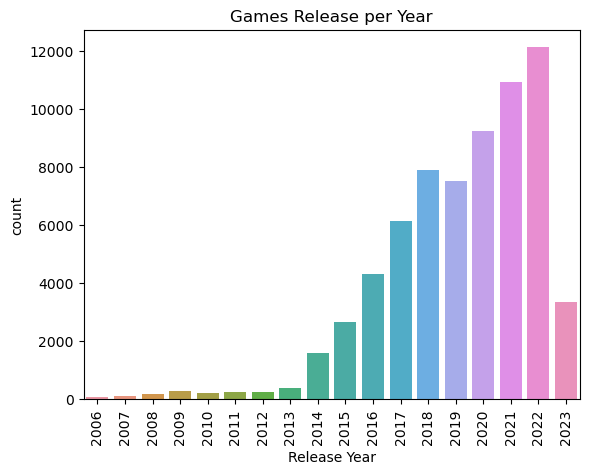

In [105]:
count_plot = sns.countplot(x = 'release_year',
               data = game_data)
count_plot.set_xticklabels(count_plot.get_xticklabels(), rotation = 90)
count_plot.set_xlabel('Release Year')
count_plot.set_title('Games Release per Year')
plt.show()